### Dimension Reduction

- Dimension reduction finds pattern in data and uses these patterns to re-express it in a compressed form.
- This makes subsequent computation with data much more efficient and this can be a big deal in world of big datasets.
- The most important function of dimension reduction is to reduce a dataset to it's "bare bones" discarding noisy features that cause big problem for supervised tasks like classification and regression.
- In many real world applications it's dimension reduction that makes prediction possible.

### PCA (Prinipal Component Analysis)

- PCA (Prinipal Component Analysis) is an unsupervised dimentionality reduction technique.
- Technique to be used in preprocessing step.
- Goal is to reduce the dimentionality of the data
- Identifies the combination of atributes which accounts for the most variance among the data
- Used for linear samples in a dataset

**Steps:**
1. Standardize the data
2. Use standardized data to generate covariance/correlation matrix 
        [Covariance indicates the level to which two variables vary together]
3. Perfrom eigen decomposition i.e. compute eigen vectors that are pricipal components which will give direction and compute eigen values which will give the magnitude.
        [If A is a n x n martix, a scalar lambda is called in eigen value of A if there is a nonzero vector X^ such that 
        A * x^=lambda * X^
        Such a vector X^is called and eigen vector of A corresponing to lambda.]
4. Sort the eigen pairs and select eigen vectors with largest eigen value that cumulatively capture information above a certain threshold.

**Additional notes:**
1. PCA is not a classifier, it's just a dimensionality reduction step used during pre-processing
2. PCAs are newly generated values from avaialble variable

** Ref**
- [Nice Explanation](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

** imports ** 
- I will import required libraries wherever required.

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

** Load data and check numerical statistics**

In [3]:
data=pd.read_csv('Iris.csv')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB
None
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


** Encode categorical features i.e. Species to numerical**

In [32]:
data['Species_num']=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})
# this is required for comparison only and we will not use this feature as its unsupervised method

** Create feature data**
- As it is an unsupervised method I have dropped class column i.e. species

In [5]:
X=data.iloc[:,1:5]

** Scale the data **

In [6]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_std=ss.fit_transform(X)

In [7]:
X_std.shape

(150, 4)

** calculate PCA components with numpy**

In [8]:
# calculate covariance matrix
X_cov=np.cov(X_std.T)

In [9]:
X_cov

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [10]:
# Compute the eigenvalues and eigenvectors
# np.linalg.eig will return 2 variables
e_val, e_vec=np.linalg.eig(X_cov)

In [11]:
print(e_val)
print(e_vec)

[ 2.93035378  0.92740362  0.14834223  0.02074601]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [12]:
e_pair=[(e_val[i], e_vec[:,i]) for i in range (len(e_val))]

In [13]:
e_pair

[(2.9303537755893192,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.92740362151734124,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648163986,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.020746013995595971,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [14]:
# calculate variance
variance= [(i/sum(e_val))* 100 for i in e_val]

In [15]:
variance

[72.770452093801367,
 23.030523267680621,
 3.6838319576273868,
 0.51519268089063286]

In [16]:
# Calculate cumulative variance
# We will compare this variance with scikit learn PCA method
np.cumsum(variance)

array([  72.77045209,   95.80097536,   99.48480732,  100.        ])

** PCA components with scikit learn**

In [17]:
from sklearn.decomposition import PCA
pca1=PCA()
pca1.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pca1.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [19]:
pca1.explained_variance_ratio_
# Compare this with component variance found using numpy. Both are same

array([ 0.72770452,  0.23030523,  0.03683832,  0.00515193])

In [20]:
pca1.explained_variance_

array([ 2.93035378,  0.92740362,  0.14834223,  0.02074601])

In [21]:
# Cumulative variance
np.cumsum(pca1.explained_variance_ratio_)

array([ 0.72770452,  0.95800975,  0.99484807,  1.        ])

In [22]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_num'],
      dtype='object')

In [23]:
pd.DataFrame((pca1.components_), index=X.columns, columns=['PCA_'+str(i) for i in range(0,len(pca1.explained_variance_ratio_))])

,PCA_0,PCA_1,PCA_2,PCA_3
SepalLengthCm,0.522372,-0.263355,0.581254,0.565611
SepalWidthCm,0.372318,0.925556,0.021095,0.065416
PetalLengthCm,-0.721017,0.242033,0.140892,0.633801
PetalWidthCm,-0.261996,0.124135,0.801154,-0.523546


In [24]:
# transform data with PCA for two components and we will use this data with KMeans
pca2=PCA(n_components=2)
X_pca=pca2.fit_transform(X_std)

In [25]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
label=km.labels_

In [27]:
from sklearn.metrics import silhouette_score
silhouette_score(X_pca,km.labels_)

0.50815463395163907

Text(0.5,1,'Clustering IRIS dataset after PCA')

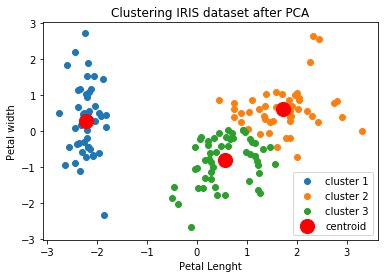

In [28]:
plt.scatter(X_pca[label==0,0],X_pca[label==0,1], label='cluster 1')
plt.scatter(X_pca[label==1,0],X_pca[label==1,1], label='cluster 2')
plt.scatter(X_pca[label==2,0],X_pca[label==2,1], label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], label='centroid', c='r', s=200)
plt.legend()
plt.xlabel('Petal Lenght')
plt.ylabel('Petal width')
plt.title('Clustering IRIS dataset after PCA')